# 앤스콤 데이터 집합 불러오기

In [1]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')
print(anscombe)
print()
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

# matplotlib 라이브러리로 간단한 그래프 그리기

In [2]:
import matplotlib.pyplot as plt

dataset_1 = anscombe[anscombe['dataset'] == 'I']

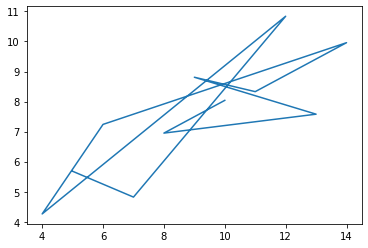

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(dataset_1['x'], dataset_1['y'])

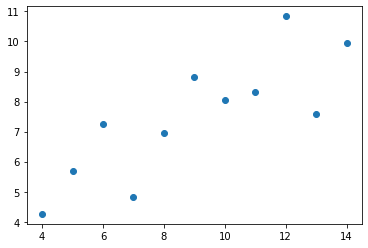

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

# 한 번에 4개의 그래프 그리기

1. 전체 그래프가 위치할 기본 틀을 만든다.
2. 그래프를 그려 넣을 그래프 격자를 만든다.
3. 격자에 그래프를 하나씩 추가한다. 

In [5]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

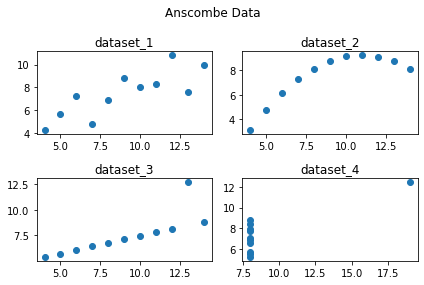

In [6]:
# 그래프 격자가 위치할 기본 틀을 만든다.
fig = plt.figure()

# 그래프 격자를 그린다 -> add_subplot 메서드 이용
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

# 그래프를 그린다
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

# 격자에 제목 추가 - set_title

axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

# 전체 그래프의 제목 추가
fig.suptitle('Anscombe Data')

fig.tight_layout()

# 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

In [7]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


## 단변량 그래프 - 히스토그램

Text(0, 0.5, 'Total Bill')

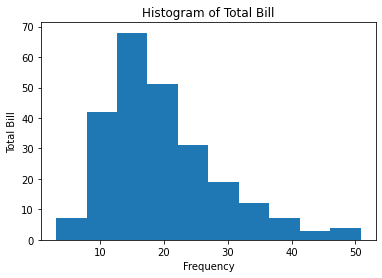

In [8]:
fig = plt.figure()
axes1 = fig.add_subplot()

axes1.hist(tips['total_bill'], bins = 10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

## 이변량그래프 - 산점도

Text(0, 0.5, 'Tip')

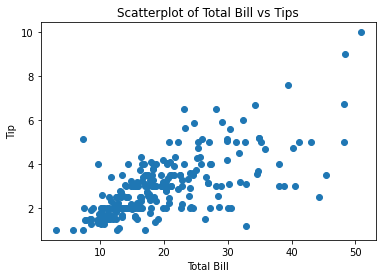

In [9]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot()

axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tips')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 이변량 그래프 - 박스 그래프

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

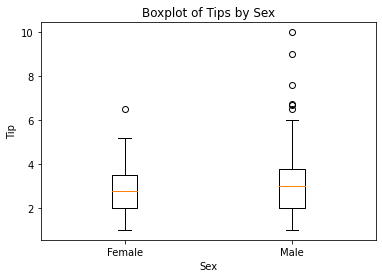

In [10]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot()
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
              labels = ['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

## 다변량 그래프 - 산점도 그래프

In [11]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

In [12]:
tips['sex_color'] = tips['sex'].apply(recode_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'Tip')

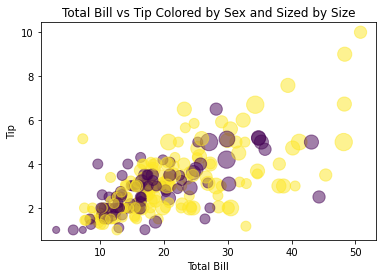

In [13]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot()

axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 50,
    c = tips['sex_color'],
    alpha = 0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# Seaborn 라이브러리

subplots 메서드로 기본 틀을 만들고 그래프를 그릴 수 있다.

## 단변량 그래프 그리기 - 히스토그램(distplot)

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

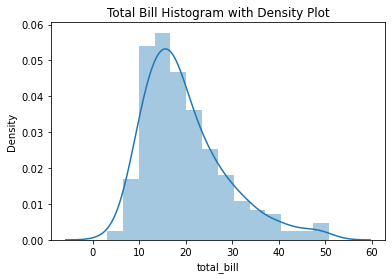

In [14]:
import warnings
warnings.filterwarnings('ignore')

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

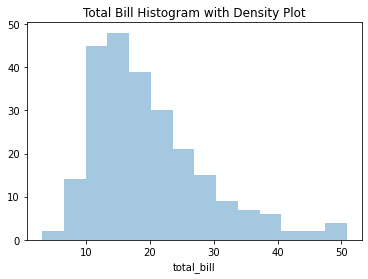

In [15]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False) # 밀집도 그래프 안나오게 하려면 kde False 설정
ax.set_title('Total Bill Histogram with Density Plot')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

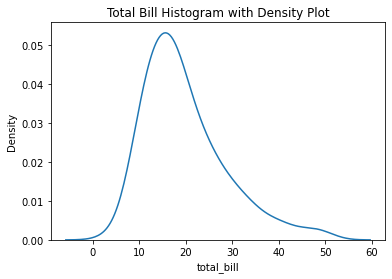

In [16]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist = False) # 밀집도 그래프만 나타내려면 hist False 설정
ax.set_title('Total Bill Histogram with Density Plot')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

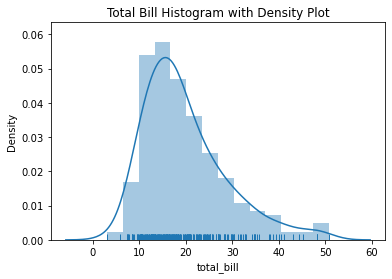

In [17]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug = True) # 데이터의 밀집정도도 표현
ax.set_title('Total Bill Histogram with Density Plot')

## 단변량 그래프 그리기 - countplot

Text(0, 0.5, 'Frequency')

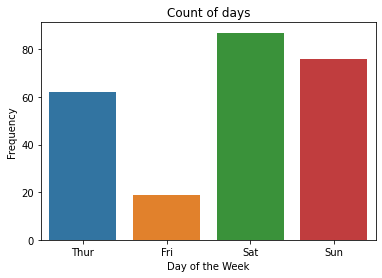

In [18]:
ax = plt.subplots()
ax = sns.countplot('day', data = tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

## 다변량 그래프 그리기 - 산점도

Text(0, 0.5, 'Tip')

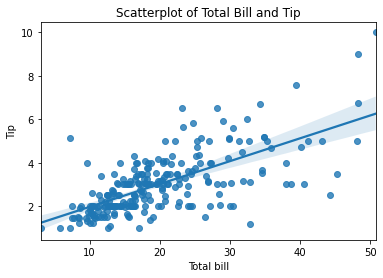

In [19]:
# 회귀선과 같이 표현되는 regplot
ax = plt.subplots()
ax = sns.regplot(x = 'total_bill', y = 'tip', data = tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

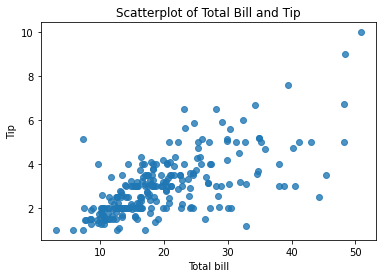

In [20]:
ax = plt.subplots()
ax = sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False) # 회귀선 제외
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total bill')
ax.set_ylabel('Tip')

## 산점도 그래프 + 히스토그램 - jointplot

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

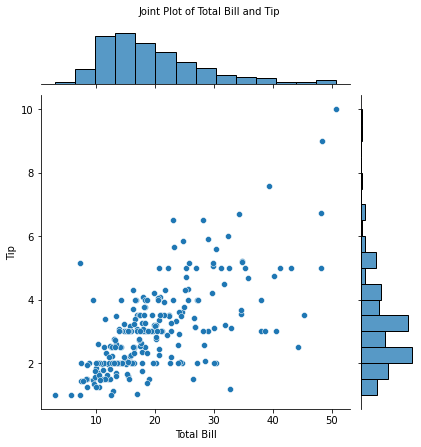

In [21]:
joint = sns.jointplot(x = 'total_bill', y = 'tip', data = tips)
joint.set_axis_labels(xlabel = 'Total Bill', ylabel = 'Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 10, y = 1.03)

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

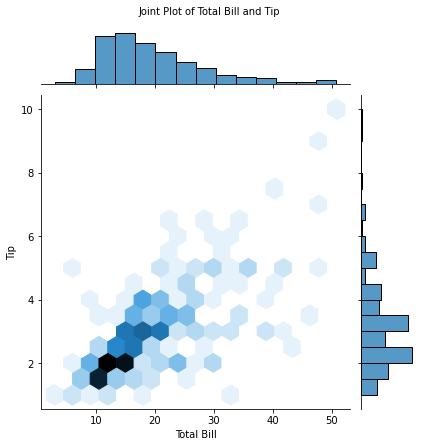

In [22]:
joint = sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')
joint.set_axis_labels(xlabel = 'Total Bill', ylabel = 'Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 10, y = 1.03)

## 이차원 밀집도

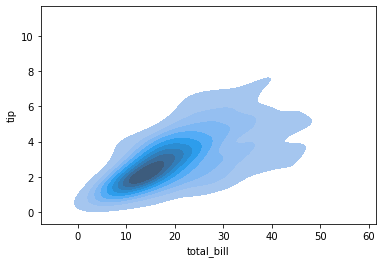

In [23]:
ax = plt.subplots()
ax = sns.kdeplot(data = tips['total_bill'],
                data2 = tips['tip'],
                shade = True)

## 바 그래프

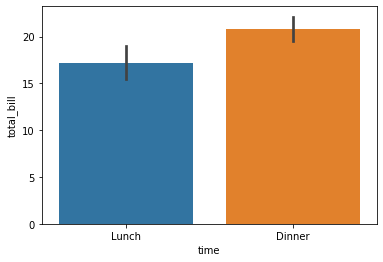

In [24]:
ax = plt.subplots()
ax = sns.barplot(x = 'time', y = 'total_bill', data = tips)

## 박스 그래프

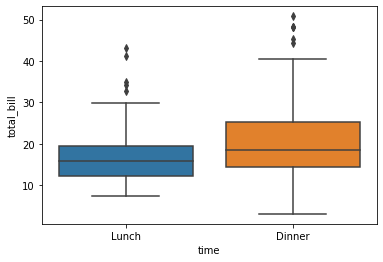

In [25]:
ax = plt.subplots()
ax = sns.boxplot(x = 'time', y = 'total_bill', data = tips)

## 바이올린 그래프

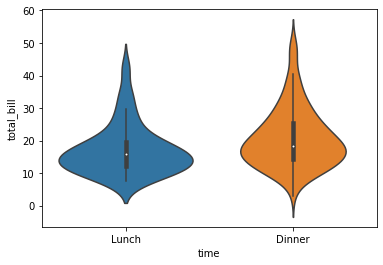

In [26]:
ax = plt.subplots()
ax = sns.violinplot(x = 'time', y = 'total_bill', data = tips)

## 관계그래프

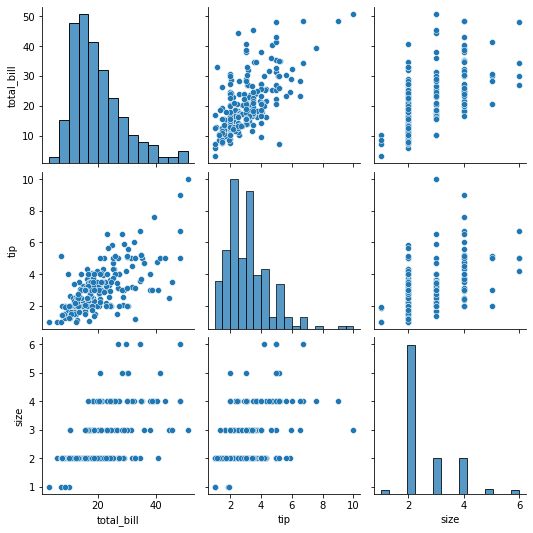

In [27]:
tips = sns.load_dataset('tips')
fig = sns.pairplot(tips)

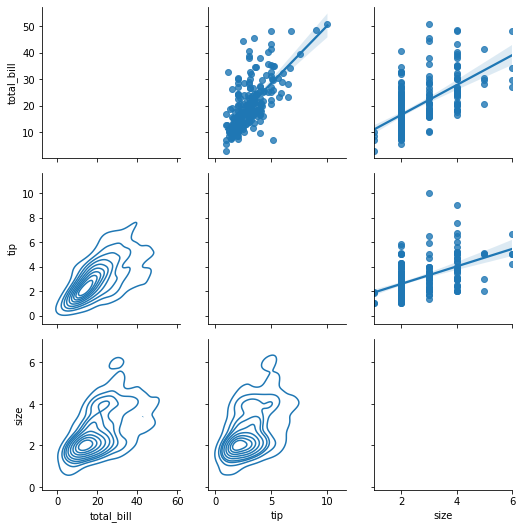

In [28]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug = True)
plt.show()

## 다변량 그래프 그리기

- hue 인자 사용

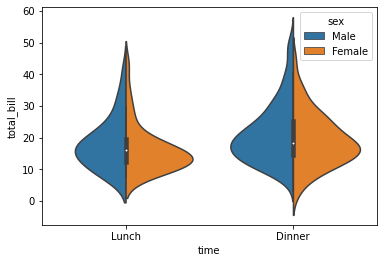

In [29]:
ax = plt.subplots()
ax = sns.violinplot(x = 'time', y = 'total_bill', hue = 'sex', data = tips, split = True)

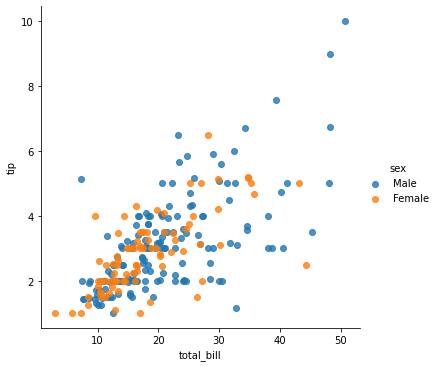

In [30]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', fit_reg = False)

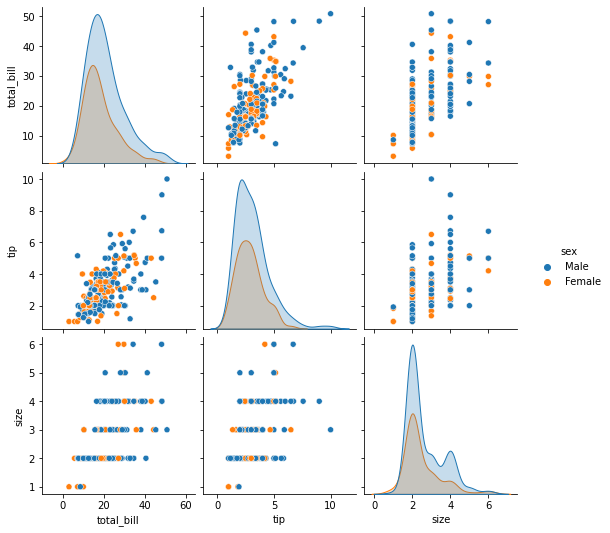

In [31]:
fig = sns.pairplot(tips, hue = 'sex')

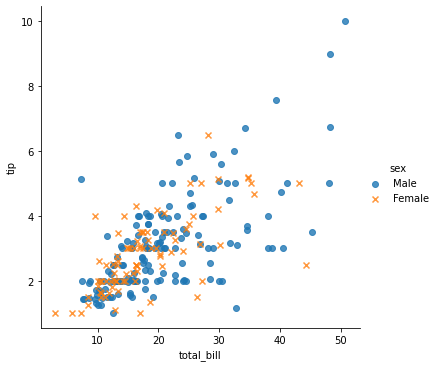

In [39]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', 
                     markers=['o', 'x']) 

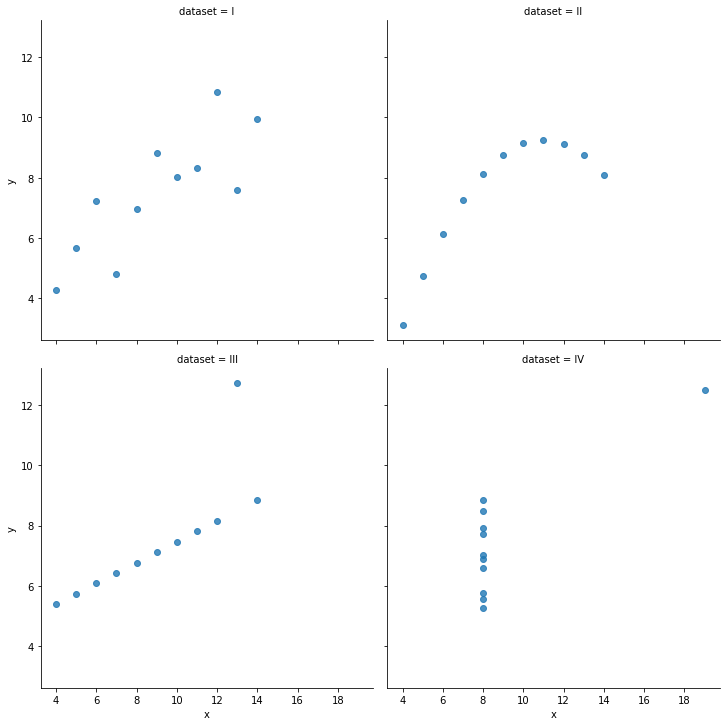

In [40]:
# col, col_warp 사용해 그래프 여러개 한번에 그리기

anscombe_plot = sns.lmplot(x = 'x', y = 'y', data = anscombe, fit_reg = False,
                          col = 'dataset', col_wrap = 2)

## 데이터프레임과 시리즈로 그래프 그리기

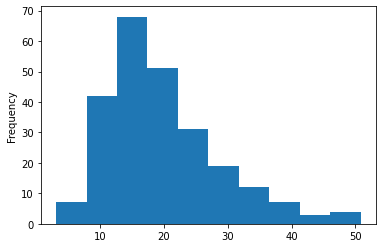

In [41]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

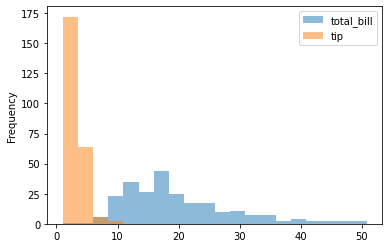

In [42]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha = 0.5, bins = 20, ax = ax) # bins : x축 간격

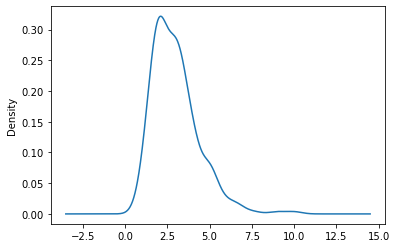

In [43]:
ax = plt.subplots()
ax = tips['tip'].plot.kde()

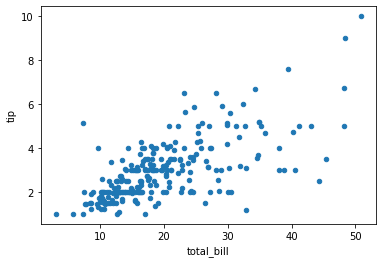

In [44]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x = 'total_bill', y = 'tip', ax = ax)

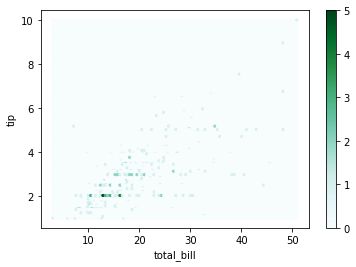

In [45]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = 'total_bill', y = 'tip', ax = ax)

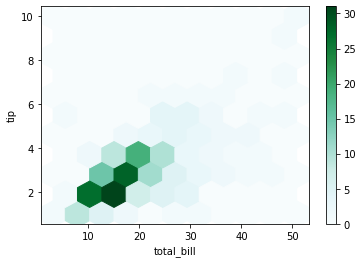

In [47]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = 'total_bill', y = 'tip', gridsize = 10, ax = ax)
# gridsize : 육각형 크기 변경

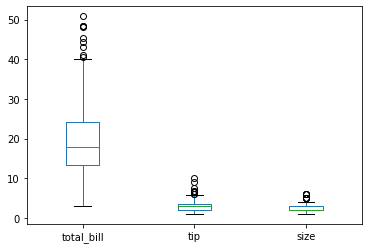

In [48]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax = ax)

# 알아두면 좋아요

- seaborn -> set_style 메서드 이용


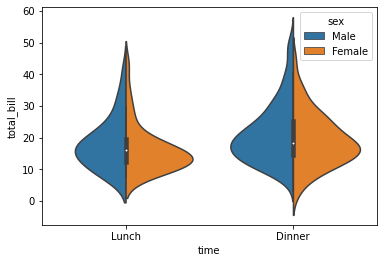

In [49]:
fig, ax = plt.subplots()
ax = sns.violinplot(x = 'time', y = 'total_bill', hue = 'sex', data = tips, split = True)

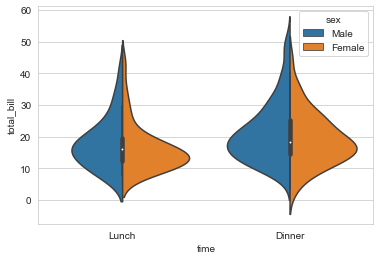

In [50]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x = 'time', y = 'total_bill', hue = 'sex', data = tips, split = True)

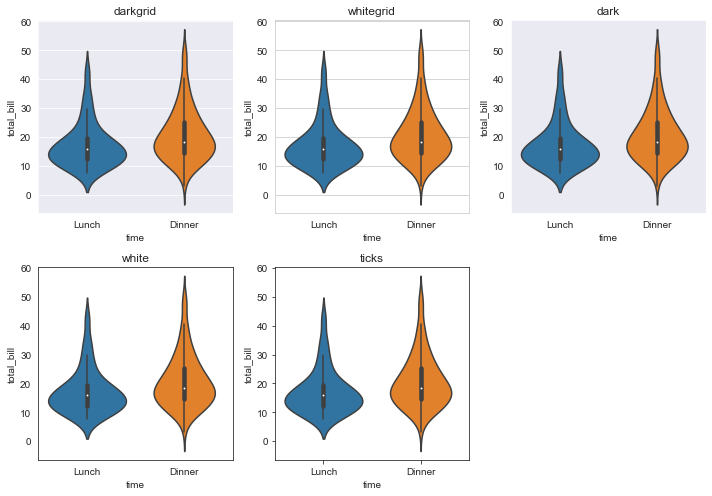

In [52]:
fig = plt.figure(figsize = (10, 7))
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x = 'time', y = 'total_bill', data = tips, ax = ax)
        violin.set_title(style)
        
fig.tight_layout()